In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def loadDataSet(fileName):
    dataMat=[]
    fr=open(fileName)
    for line in fr.readlines():
        curLine=line.strip().split('\t')
        fltLine=map(float,curLine)
        fltLine=list(fltLine)
        dataMat.append(fltLine)
    return dataMat

In [40]:
def disEclud(vecA,vecB):
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))

In [30]:
def randCent(dataSet,k):
    n=np.shape(dataSet)[1]
    centroids=np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ=np.min(dataSet[:,j])
        rangeJ=float(max(dataSet[:,j])-minJ)
        centroids[:,j]=minJ+rangeJ*np.random.rand(k,1)
    return centroids

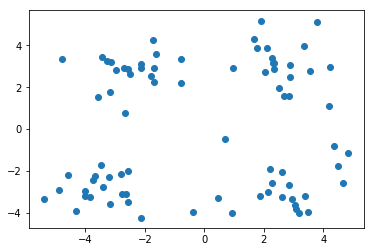

In [46]:
datMat=np.mat(loadDataSet('testSet.txt'))
plt.scatter(np.array(datMat)[:,0],np.array(datMat)[:,1])

In [32]:
min(datMat[:,0])

matrix([[-5.379713]])

In [33]:
min(datMat[:,1])

matrix([[-4.232586]])

In [34]:
max(datMat[:,0])

matrix([[4.838138]])

In [35]:
max(datMat[:,1])

matrix([[5.1904]])

In [36]:
randCent(datMat,2)

matrix([[2.39826992, 4.2594282 ],
        [3.60211471, 1.73441425]])

In [41]:
disEclud(datMat[0],datMat[1])

5.184632816681332

In [54]:
def KMeans(dataSet,k,distMeas=disEclud,createCent=randCent):
    m=np.shape(dataSet)[0]
    clusterAssment=np.mat(np.zeros((m,2)))
    centroids=createCent(dataSet,k)
    clusterChanged=True
    while clusterChanged:
        clusterChanged=False
        for i in range(m):
            minDist=np.inf
            minIndex=-1
            for j in range(k):
                distJI=distMeas(centroids[j,:],dataSet[i,:])
                if distJI<minDist:
                    minDist=distJI
                    minIndex=j
            if clusterAssment[i,0]!=minIndex: clusterChanged=True
            clusterAssment[i,:]=minIndex,minDist**2
        print(centroids)
        for cent in range(k):
            ptsInClust=dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:]=np.mean(ptsInClust,axis=0)
    return centroids,clusterAssment

In [55]:
myCentroids,clustAssing=KMeans(datMat,4)

[[ 2.7933393   4.86032658]
 [-0.04465344  2.70015022]
 [ 4.64858506 -2.18213887]
 [-3.65790072 -2.52562928]]
[[ 2.66582864  3.58964221]
 [-1.44284192  2.54076788]
 [ 3.11052774 -2.61694289]
 [-3.19984738 -2.96423548]]
[[ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]
 [ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]]


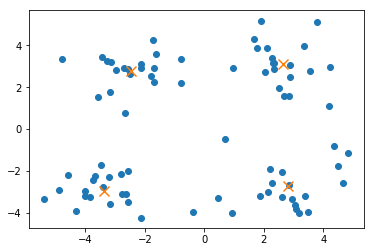

In [61]:
plt.scatter(np.array(datMat)[:,0],np.array(datMat)[:,1])
plt.scatter(np.array(myCentroids)[:,0],np.array(myCentroids)[:,1],marker='x',s=100)

In [62]:
def biKmeans(dataSet,k,distMeas=disEclud):
    m=np.shape(dataSet)[0]
    clustAssment=np.mat(np.zeros((m,2)))
    centroid0=np.mean(dataSet,axis=0).tolist()[0]
    centList=[centroid0]
    for j in range(m):
        clustAssment[j,1]=distMeas(np.mat(centroid0),dataSet[j,:])**2
    while (len(centList)<k):
        lowestSSE=np.inf
        for i in range(len(centList)):
            ptsInCuurCluster=dataSet[np.nonzero(clustAssment[:,0].A==i)[0],:]
            centroidMat,splitClustAss=KMeans(ptsInCuurCluster,2,distMeas)
            sseSplit=sum(splitClustAss[:,1])
            sseNotSplit=sum(clustAssment[np.nonzero(clustAssment[:,0].A!=i)[0],1])
            print('sseSplit,and notSplit:',sseSplit,sseNotSplit)
            if (sseSplit+sseNotSplit)<lowestSSE:
                bestCentToSplit=i
                bestNewCents=centroidMat
                bestClustAss=splitClustAss.copy()
                lowestSSE=sseSplit+sseNotSplit
        bestClustAss[np.nonzero(bestClustAss[:,0].A==1)[0],0]=len(centList)
        bestClustAss[np.nonzero(bestClustAss[:,0].A==0)[0],0]=bestCentToSplit
        print('the bestCentToSplit is :',bestCentToSplit)
        print('the len of bestClustAss :',len(bestClustAss))
        centList[bestCentToSplit]=bestNewCents[0,:].tolist()[0]
        centList.append(bestNewCents[1,:].tolist()[0])
        clustAssment[np.nonzero(clustAssment[:,0].A==bestCentToSplit)[0],:]=bestClustAss
    return np.mat(centList),clustAssment

In [63]:
dataMat3=loadDataSet('testSet2.txt')

In [66]:
centList,myNewAssments=biKmeans(np.mat(dataMat3),3)

[[ 3.5880231   1.99889111]
 [-4.71768389 -0.80110591]]
[[ 2.5925233   2.57443939]
 [-1.86733516  0.38669462]]
[[ 2.93386365  3.12782785]
 [-1.70351595  0.27408125]]
sseSplit,and notSplit: [[541.29762926]] 0
the bestCentToSplit is : 0
the len of bestClustAss : 60
[[4.16322222 4.5291185 ]
 [4.13326132 4.08535719]]
[[4.376754   4.863579  ]
 [2.85792205 3.03647253]]
[[4.49912533 4.07164   ]
 [2.657641   2.96127276]]
[[4.3530075  3.94355575]
 [2.57907769 2.92389588]]
[[4.2819634  3.658577  ]
 [2.48449707 2.95091147]]
sseSplit,and notSplit: [[25.53551471]] [[501.76833058]]
[[-4.42438914 -1.14624367]
 [-1.85355016 -3.94731635]]
[[-2.94737575  3.3263781 ]
 [-0.45965615 -2.7782156 ]]
sseSplit,and notSplit: [[67.22020008]] [[39.52929868]]
the bestCentToSplit is : 1
the len of bestClustAss : 40


In [70]:
# myNewAssments

In [67]:
centList

matrix([[ 2.93386365,  3.12782785],
        [-2.94737575,  3.3263781 ],
        [-0.45965615, -2.7782156 ]])

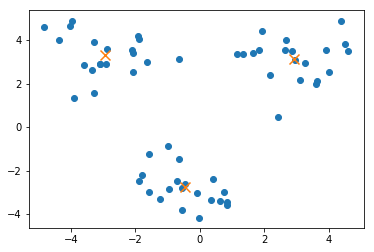

In [68]:
plt.scatter(np.array(dataMat3)[:,0],np.array(dataMat3)[:,1])
plt.scatter(np.array(centList)[:,0],np.array(centList)[:,1],marker='x',s=100)

In [76]:
from numpy import *

In [77]:
#distance calc function：结合两个点经纬度（用角度做单位），返回地球表面两点之间距离
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1]*pi/180)
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1]*pi/180) * cos(pi * (vecB[0,0]-vecA[0,0]) /180)
    return arccos(a + b)*6371.0 #pi is imported with numpy

#draw function
import matplotlib
import matplotlib.pyplot as plt
def clusterClubs(numClust=5):#参数：希望得到的簇数目
    datList = []
    for line in open('places.txt').readlines():#获取地图数据
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])#逐个获取第四列和第五列的经纬度信息
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    #draw
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]#创建矩形
    #创建不同标记图案
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')#导入地图
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)

[[-122.80716252   45.53577334]
 [-122.46492404   45.49869583]]
[[-122.70981637   45.51478609]
 [-122.56409551   45.51016235]]
sseSplit,and notSplit: 3073.830371585315 0.0
the bestCentToSplit is : 0
the len of bestClustAss : 69
[[-122.78282175   45.63519387]
 [-122.80296755   45.56349427]]
[[-122.7283032    45.6007366 ]
 [-122.70639289   45.49886933]]
[[-122.72070683   45.59796783]
 [-122.70730319   45.49559031]]
sseSplit,and notSplit: 1047.9405734158868 1388.7998455647623
[[-122.44401533   45.56231542]
 [-122.62932097   45.52979498]]
[[-122.4568086    45.4961344 ]
 [-122.58085909   45.51235422]]
sseSplit,and notSplit: 970.3982709944548 1685.0305260205523
the bestCentToSplit is : 0
the len of bestClustAss : 32
[[-122.79313227   45.62108527]
 [-122.71541801   45.60502036]]
[[-122.842918    45.646831 ]
 [-122.6962646   45.5881952]]
sseSplit,and notSplit: 24.09829508946755 2268.8040134989437
[[-122.55121382   45.47430109]
 [-122.53518878   45.45887848]]
[[-122.57208188   45.51585285]
 [-12

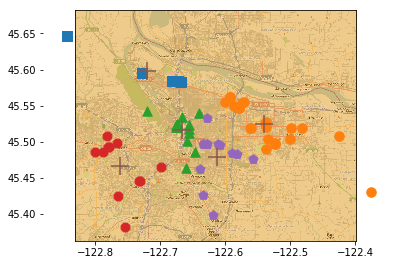

In [78]:
clusterClubs()

In [80]:
from sklearn.cluster import KMeans
import pandas as pd

In [82]:
df=pd.read_csv('places.txt',header=None,sep='\t')
df.head()

,0,1,2,3,4
0,Dolphin II,10860 SW Beaverton-Hillsdale Hwy,"Beaverton, OR",45.486502,-122.788346
1,Hotties,10140 SW Canyon Rd.,"Beaverton, OR",45.493150,-122.781021
2,Pussycats,8666a SW Canyon Road,"Beaverton, OR",45.498187,-122.766147
3,Stars Cabaret,4570 Lombard Ave,"Beaverton, OR",45.485943,-122.800311
4,Sunset Strip,10205 SW Park Way,"Beaverton, OR",45.508203,-122.781853


In [83]:
model=KMeans(n_clusters=5)

In [100]:
X=df.drop([0,1,2],axis=1)

In [102]:
y=model.fit(X)

In [103]:
y.cluster_centers_

array([[  45.53354956, -122.57296733],
       [  45.4665528 , -122.7680632 ],
       [  45.49920908, -122.65078825],
       [  45.4967901 , -122.4927627 ],
       [  45.59011757, -122.72072414]])

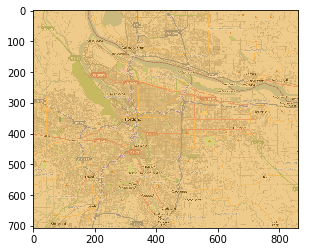

In [109]:
imgP=plt.imread('Portland.png')
plt.imshow(imgP)